In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Model setting-up
<ol>
    <li>Disk has intial Toomre-Q = 1.5, and truncates at R = 6.</li>
    <li>Halo is rigid, with HERN index = 20, truncates at R = 500.</li>
    <li>Pattern speed (from <b>modefit</b>) &Omega;<sub>bar</sub> = 0.542, &Omega;<sub>spiral</sub> = 0.228</li>
    <li>The corresponding co-rotation radius (estimated from <b>spct</b>) R<sub>bar</sub> ~ 3.2, and R<sub>spiral</sub> ~ 7.0</li>
</ol>

### Read out data files & analysis
<ul>
    <li>DATA: Positions ( x, y, z ), angular momentum, and energy ( potential + kinetic )</li>
    <li>&Delta;t = 10 ( equivalent to 400 timesteps in simulation )</li>
    <li>analyzed: distribution & evolution of L<sub>Z</sub>, E<sub>J</sub> in time interval t = 150 ~ 160.</li>
</ul>

In [3]:
# later time step
nn = 160
# step interval
dn = 10

filename1=('../data/ptcls_info_t%3.3d.dat')%(nn)
x1,y1,z1,ang1,te1=np.loadtxt(filename1,usecols=[0,1,2,3,4],unpack=True)
filename2=('../data/ptcls_info_t%3.3d.dat')%(nn-dn)
x2,y2,z2,ang2,te2=np.loadtxt(filename2,usecols=[0,1,2,3,4],unpack=True)

omega_bar = 0.542
CR_bar = 3.2
CR_spiral = 7.0

R_max = 8.

#r1, r2, ang1, ang2, Ej1, Ej2
if(len(x1) == len(x2)):
    r1 = [np.sqrt(x1[i]**2 + y1[i]**2) for i in range(len(x1))]
    r2 = [np.sqrt(x2[i]**2 + y2[i]**2) for i in range(len(x2))]
    dr = [r1[i] - r2[i] for i in range(len(x1))]
    da = [ang1[i] - ang2[i] for i in range(len(x1))]
    Ej1 = [te1[i] - omega_bar * ang1[i] for i in range(len(x1))]
    Ej2 = [te2[i] - omega_bar * ang2[i] for i in range(len(x2))]
    dEj = [Ej1[i] - Ej2[i] for i in range(len(x1))]
else:
    print('error: NOT equal size!')

1.Angular momentum vs. R
----
The radial distribution of L<sub>Z</sub> at T = 160.

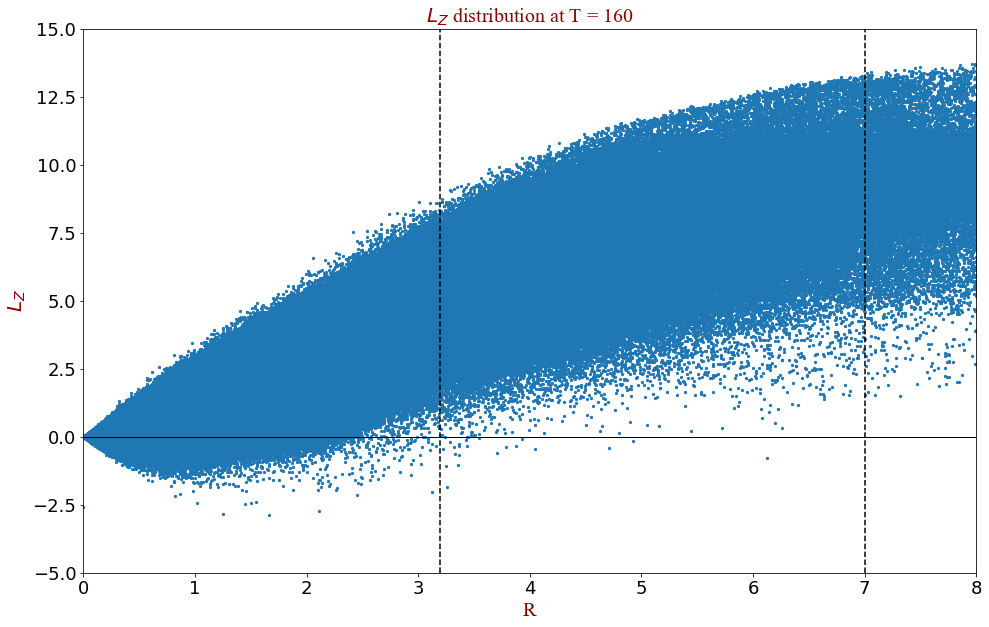

In [4]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(r1, ang1, s=5)

# show X axis
plt.axhline(y = 0., linewidth = 1, linestyle = '-', color = 'k')

# show CR
plt.axvline(x = CR_bar, linewidth = 1.5, linestyle = '--', color = 'k')
plt.axvline(x = CR_spiral, linewidth = 1.5, linestyle = '--', color = 'k')

ax = plt.gca()
ax.set_xlim(0, R_max)
ax.set_ylim(-5,15)

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$L_{Z}$',fontdict=font)

#title
titleStr='$L_{Z}$ distribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname0='./output/Lz_R_t'+str(nn)+'.png'
plt.savefig(figname0)

### Following is a colored version of this figure

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


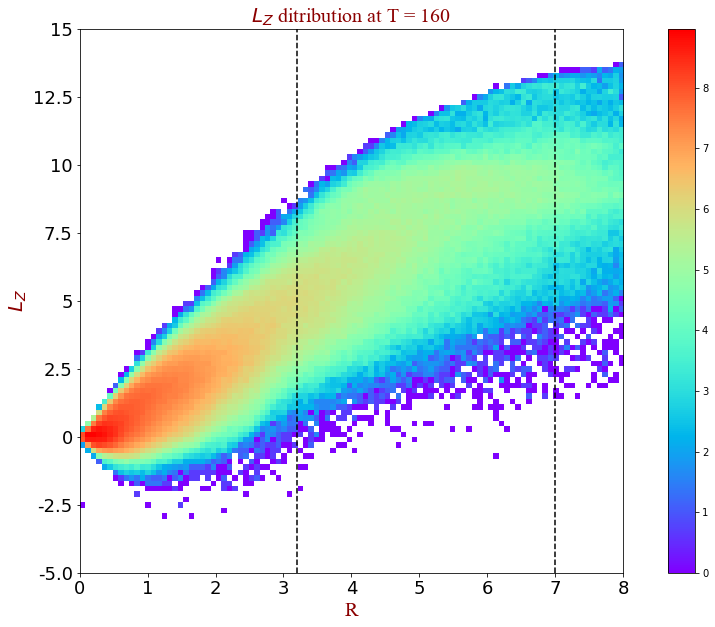

In [5]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)

H,xedges,yedges = np.histogram2d(ang1,r1,bins=(100,100),range=([-5,15],[0,R_max]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# show X axis
plt.axhline(y = 0., linewidth = 1, linestyle = '-', color = 'k')

# show CR
plt.axvline(x = CR_bar / R_max, linewidth = 1.5, linestyle = '--', color = 'k')
plt.axvline(x = CR_spiral / R_max, linewidth = 1.5, linestyle = '--', color = 'k')

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('0','1','2','3','4','5','6','7','8'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-5.0', '-2.5', '0', '2.5', '5', '7.5', '10',  '12.5',  '15'))

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$L_{Z}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)

#title
titleStr='$L_{Z}$ ditribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/Lz_R_t'+str(nn)+'_color.png'
plt.savefig(figname1)

### This figure shows L<sub>Z</sub> at T = 160:
<ul>
    <font size="+1">
    <li>inside the <b>R<sub>CR</sub> of bar</b>: mainly <b>L<sub>Z</sub> < 7.5.</b> </li> 
    <li>around the <b>R<sub>CR</sub> of spiral</b>: mainly <b>5 < L<sub>Z</sub> < 10.</b> </li>
    </font>
</ul>                                                     

2.Total Energy vs. R
----
The radial distribution of energy ( potential + kinetic ) at T = 160.

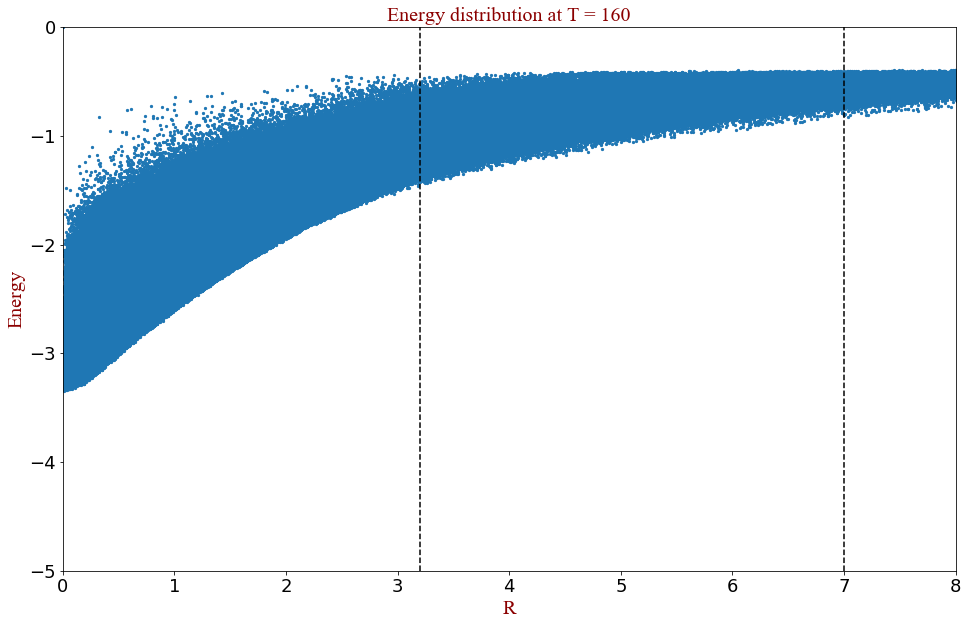

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(r1, te1, s=5)
# show CR
plt.axvline(x = CR_bar, linewidth = 1.5, linestyle = '--', color = 'k')
plt.axvline(x = CR_spiral, linewidth = 1.5, linestyle = '--', color = 'k')

ax = plt.gca()
ax.set_xlim(0,R_max)
ax.set_ylim(-5,0)

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('Energy',fontdict=font)

#title
titleStr='Energy distribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname2='./output/Te_R_t'+str(nn)+'.png'
plt.savefig(figname2)

3.Ej vs. R
----
The radial distribution of <b>Jacobi energy E<sub>J</sub> </b> ( E<sub>J</sub> = E - &Omega;<sub>P</sub> &#10005; L<sub>Z</sub> ) at T = 160.

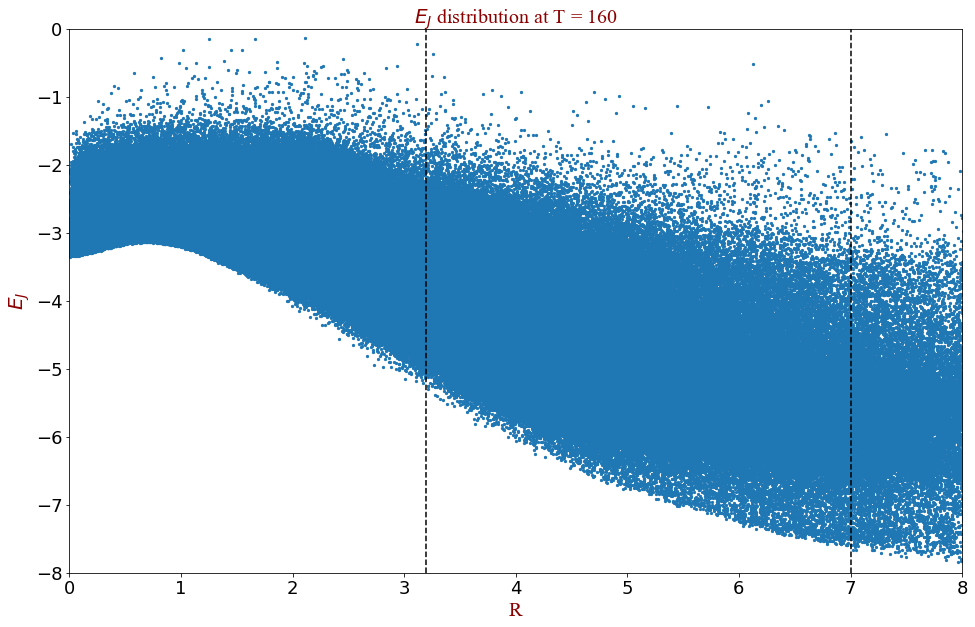

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(r1, Ej1, s=5)

# show CR
plt.axvline(x = CR_bar, linewidth = 1.5, linestyle = '--', color = 'k')
plt.axvline(x = CR_spiral, linewidth = 1.5, linestyle = '--', color = 'k')

ax = plt.gca()
ax.set_xlim(0,R_max)
ax.set_ylim(-8,0)

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$E_{J}$',fontdict=font)

#title
titleStr='$E_{J}$ distribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname3='./output/Ej_R_t'+str(nn)+'.png'
plt.savefig(figname3)

### Following is a colored version of this figure

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


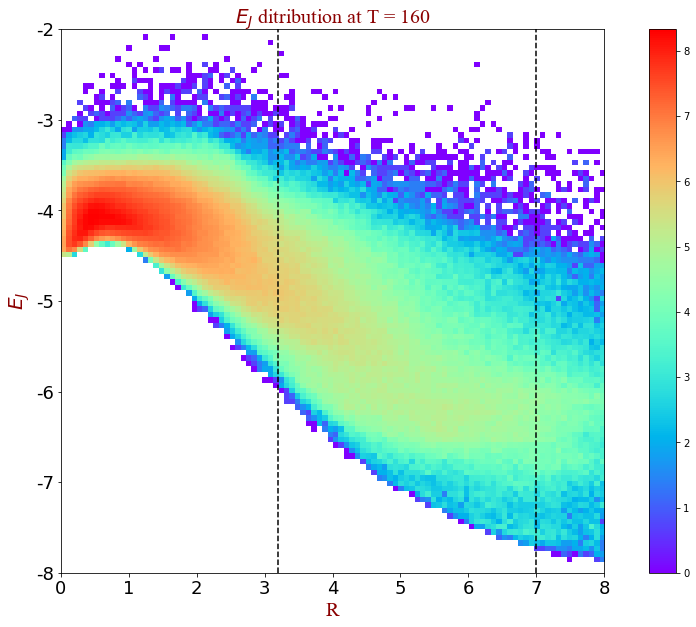

In [8]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(Ej1,r1,bins=(100,100),range=([-8,0],[0,R_max]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# show CR
plt.axvline(x = CR_bar / R_max, linewidth = 1.5, linestyle = '--', color = 'k')
plt.axvline(x = CR_spiral / R_max, linewidth = 1.5, linestyle = '--', color = 'k')

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('0','1','2','3','4','5','6','7','8'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,7))
ax.set_yticklabels( ('-8', '-7', '-6', '-5', '-4', '-3',  '-2',  '-1', '0'))

#set label
ax.set_xlabel('R',fontdict=font)
ax.set_ylabel('$E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)

#title
titleStr='$E_{J}$ ditribution at T = '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname4='./output/Ej_R_t'+str(nn)+'_color.png'
plt.savefig(figname4)

### This figure shows E<sub>J</sub> at T = 160:
<ul>
    <font size="+1">
    <li>inside the <b>R<sub>CR</sub> of bar</b>: mainly <b>E<sub>J</sub> > -6.0 (especially around -4.0).</b> </li> 
    <li>around the <b>R<sub>CR</sub> of spiral</b>: mainly <b> -7.5 < E<sub>J</sub> < -5.0. </b> </li>
    </font>
</ul>                                                     

4.change of the Jacobi Energy
----
The change of <b>Jacobi energy E<sub>J</sub> </b> in &Delta;t =10 ( <b>T = 150 ~ 160</b> )

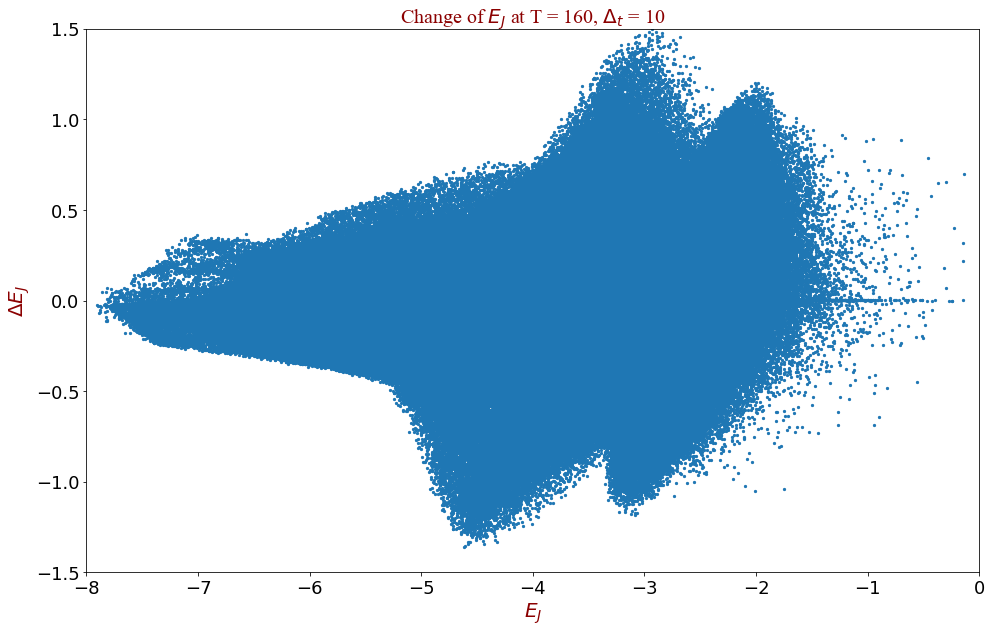

In [9]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(Ej1,dEj,s=5)

ax = plt.gca()
ax.set_xlim(-8,0)
ax.set_ylim(-1.5,1.5)

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#title
titleStr='Change of $E_{J}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname5='./output/dEj_t'+str(nn)+'.png'
plt.savefig(figname5)

### Following is a colored version of this figure

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


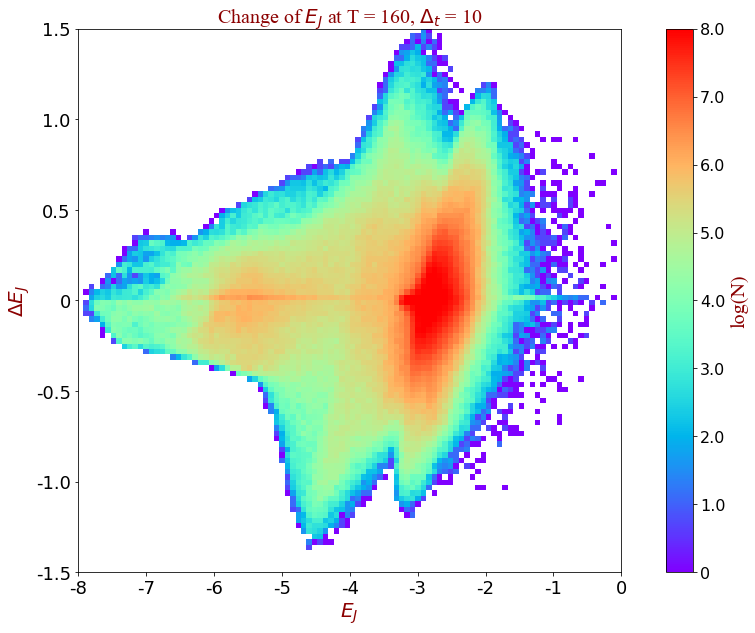

In [10]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(dEj,Ej1,bins=(100,100),range=([-1.5,1.5],[-8,0]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('-8', '-7', '-6', '-5', '-4', '-3',  '-2',  '-1', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,7))
ax.set_yticklabels( ('-1.5', '-1.0', '-0.5', '0',  '0.5',  '1.0',  '1.5'))

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $E_{J}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname6a='./output/dEj_Ej1_t'+str(nn)+'_color.png'
plt.savefig(figname6a)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


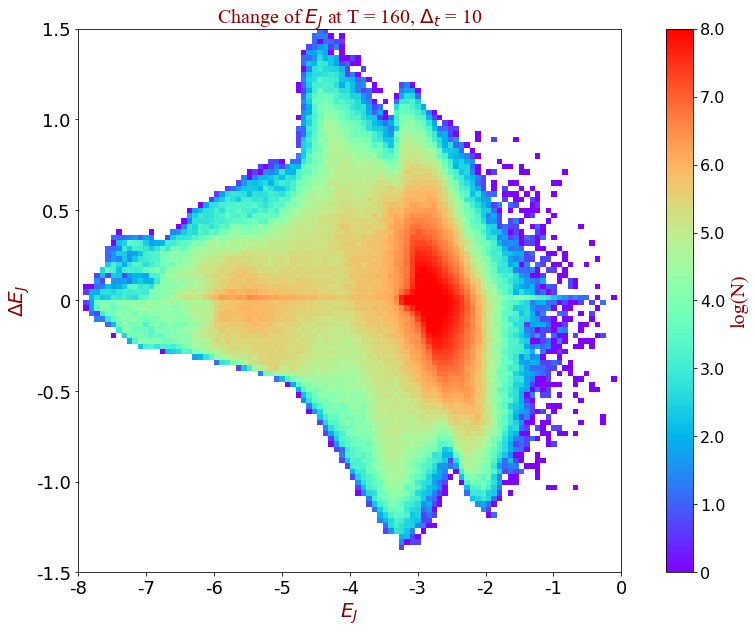

In [11]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(dEj,Ej2,bins=(100,100),range=([-1.5,1.5],[-8,0]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,9))
ax.set_xticklabels( ('-8', '-7', '-6', '-5', '-4', '-3',  '-2',  '-1', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,7))
ax.set_yticklabels( ('-1.5', '-1.0', '-0.5', '0',  '0.5',  '1.0',  '1.5'))

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $E_{J}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname6b='./output/dEj_Ej2_t'+str(nn)+'_color.png'
plt.savefig(figname6b)

### This figure shows the change of E<sub>J</sub> in T = 150 to 160:
Density peaks:  
<ol>
    <li>E<sub>J</sub> ~ -3.0 ( very small fraction in bar, but is the <b>highest number density region</b> in this figure )</li>
    <li>E<sub>J</sub> ~ -4.0 ( correspond to the <b>highest number density region in E<sub>J</sub> vs. R figure</b> )</li>
    <li>E<sub>J</sub> ~ -5.5 ( correspond to a very wide range, not sure this structure is due to <b>the CR of spiral</b> )</li> 
</ol>

5.change of angular momentum
----
The change of <b>Angular Momentum L<sub>z</sub></b> in &Delta;t =10 ( <b>T = 150 ~ 160</b> )

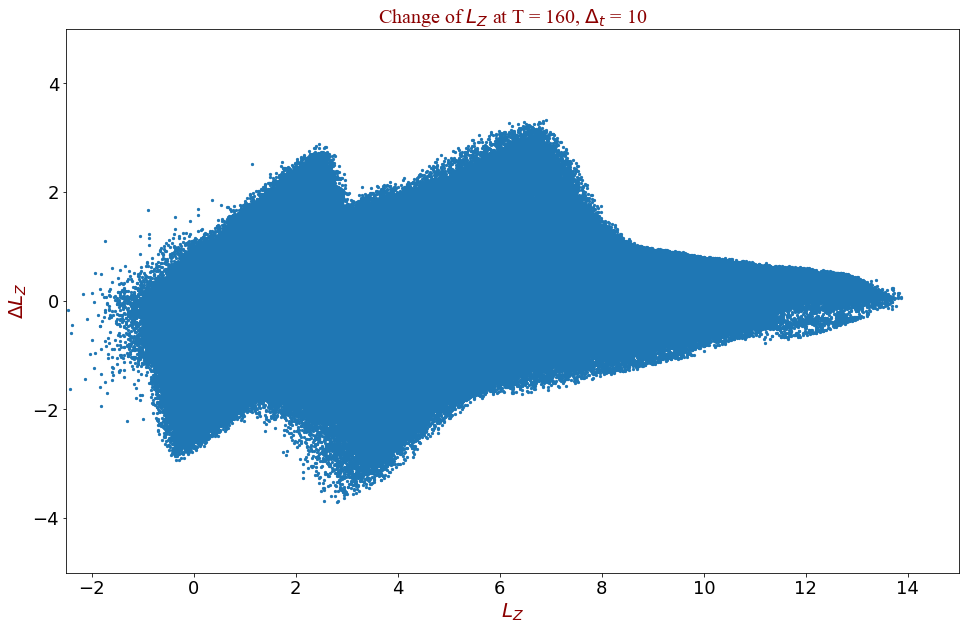

In [12]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

plt.scatter(ang1,da,s=5)

ax = plt.gca()
ax.set_xlim(-2.5,15)
ax.set_ylim(-5.,5.)

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#title
titleStr='Change of $L_{Z}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname7='./output/da_t'+str(nn)+'.png'
plt.savefig(figname7)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


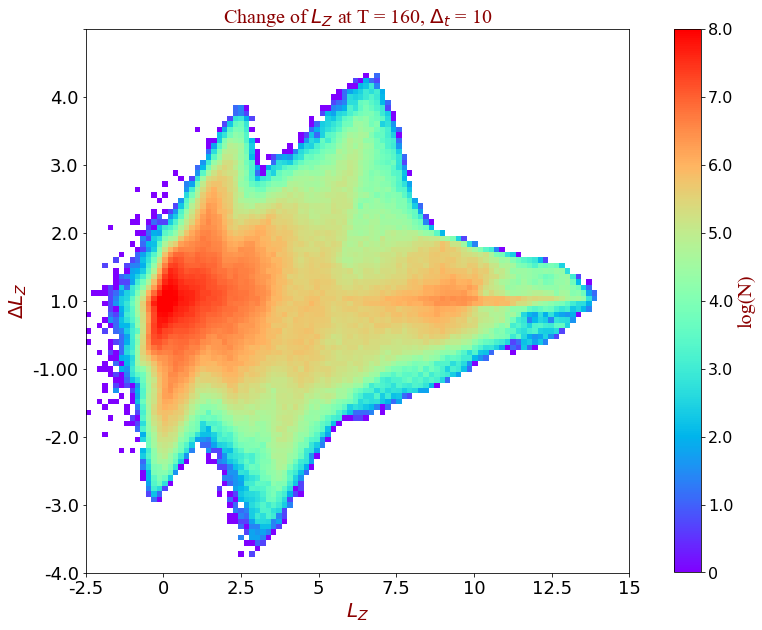

In [13]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(da,ang1,bins=(100,100),range=([-4.,4.],[-2.5,15]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,8))
ax.set_xticklabels( ('-2.5', '0', '2.5', '5', '7.5', '10',  '12.5',  '15'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0' '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $L_{Z}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname8a='./output/da_a1_t'+str(nn)+'_color.png'
plt.savefig(figname8a)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


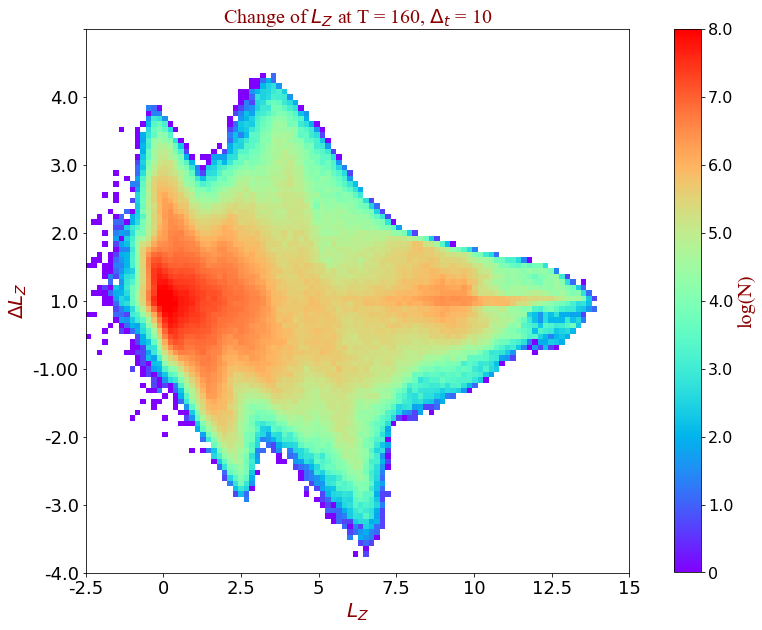

In [14]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('rainbow')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(da,ang2,bins=(100,100),range=([-4.,4.],[-2.5,15]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,8))
ax.set_xticklabels( ('-2.5', '0', '2.5', '5', '7.5', '10',  '12.5',  '15'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,9))
ax.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0' '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $L_{Z}$ at T = '+str(nn)+', $\Delta_{t}$ = '+str(dn)
plt.title(titleStr,fontdict=font)

#savefig
figname8b='./output/da_a2_t'+str(nn)+'_color.png'
plt.savefig(figname8b)

### This figure shows the change of L<sub>Z</sub> in T = 150 to 160:
Density peaks:  
<ol>
    <li>L<sub>Z</sub> < 2.0 ( all of the particles are <b>inside CR of bar.</b> )</li>
    <li>2.5 < L<sub>Z</sub> < 5.0 ( wide range of particles, not sure about the origin of these structures. But some of them should be related to <b>the CR of bar</b>. )</li>
    <li>L<sub>Z</sub> ~ 9. ( should be due to <b>the CR of spiral</b> )</li> 
</ol>

## Findings

<ol>
    <font size="+0.5">
    <li>Note this is only the evolution in a very small range of particles, thus the L<sub>Z</sub> transfer around the CR of spirals <b>should be very mild</b>. If we use a longer time interval, we expect <b>the structure in L<sub>Z</sub> - &Delta;L<sub>Z</sub></b> should be more prominent for particles with L<sub>Z</sub> ~ 9. </li>
    <li>Due to the wide range of the L<sub>Z</sub> and E<sub>J</sub> distribution in Radius, we are not sure whether these structures are really induced by these resonances (e.g. ILR, CR, OLR) at present.</li>
    </font>
</ol>